# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [11]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [55]:
kmeans = KMeans().fit_predict(X)

In [28]:
# labels
kmeans

array([3, 3, 2, 6, 4, 6, 2, 2, 3, 3, 6, 2, 2, 3, 6, 2, 2, 3, 6, 0, 4, 4,
       3, 3, 0, 0, 2, 2, 0, 3, 2, 6, 3, 2, 3, 0, 0, 3, 3, 4, 0, 3, 3, 4,
       0, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 1, 4, 1, 7, 5, 5, 4,
       1, 1, 4, 4, 0, 5, 1, 3, 0, 1, 5, 1, 4, 1, 5, 4, 7, 1, 1, 1, 1, 7,
       4, 7, 1, 1, 1, 5, 5, 0, 7, 1, 4, 5, 4, 7, 1, 5, 4, 5, 1, 1, 5, 4,
       7, 5, 7, 1, 5, 5, 1, 5, 5, 7, 7, 1, 5, 5, 5, 5, 5, 1, 5, 7, 7, 1,
       7, 7, 7, 4, 4, 1, 7, 7, 7, 4, 1, 7, 0, 0, 5, 7, 7, 7, 1, 1, 1, 4,
       7, 4, 1, 0, 4, 7, 1, 4, 7, 4, 7, 1, 4, 4, 4, 7, 1, 1, 4, 4, 4, 0,
       0, 7], dtype=int32)

In [56]:
s_score = silhouette_score(X, kmeans)
s_score

0.5398971441034137

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [82]:
kmeans_2 = KMeans(n_clusters=5).fit_predict(X)

In [83]:
s_score2 = silhouette_score(X, kmeans_2)
s_score2

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [31]:
kmeans_3 = KMeans(n_clusters=3).fit_predict(X)

In [54]:
s_score3 = silhouette_score(X, kmeans_3)
s_score3

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [66]:
# from yellowbrick.cluster import KElbowVisualizer

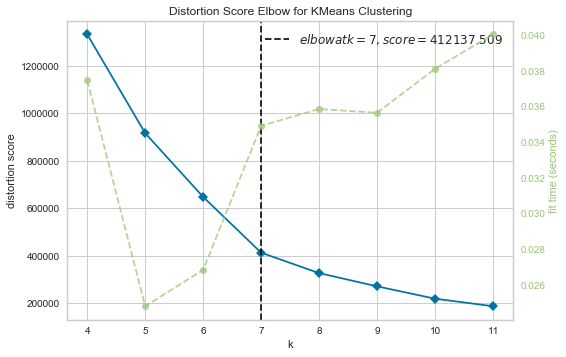

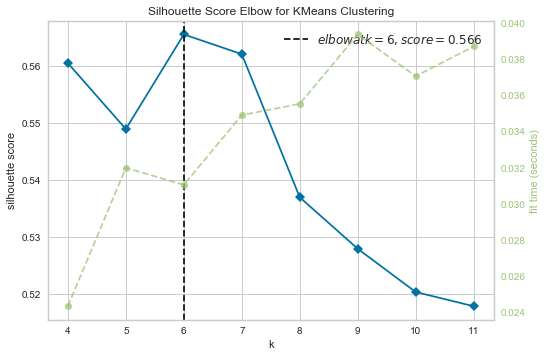

/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


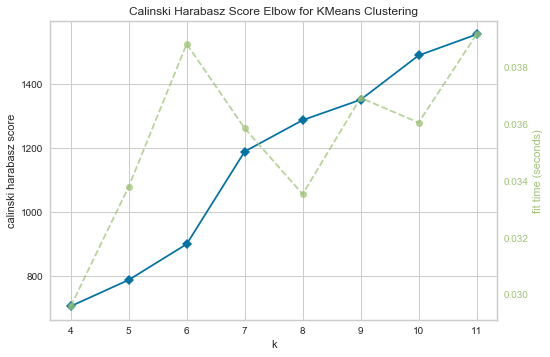

In [78]:
# 8 clusters / distortion
model_1 = KMeans()
visualizer_1d = KElbowVisualizer(model_1, k=(4,12))

visualizer_1d.fit(X)
visualizer_1d.poof()

# 8 clusters / silhouette

visualizer_1s = KElbowVisualizer(model_1, k=(4,12), metric="silhouette")

visualizer_1s.fit(X)
visualizer_1s.poof()

# 8 clusters / calinski_harabasz

visualizer_1c = KElbowVisualizer(model_1, k=(4,12), metric="calinski_harabasz")

visualizer_1c.fit(X)
visualizer_1c.poof()

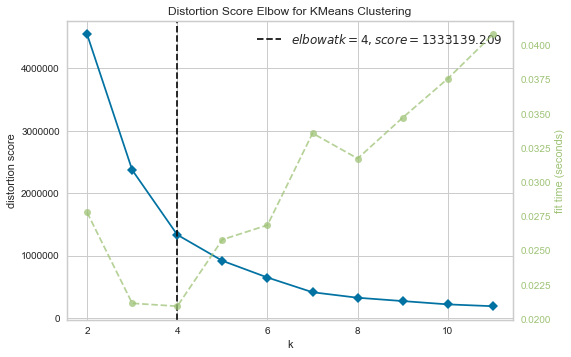

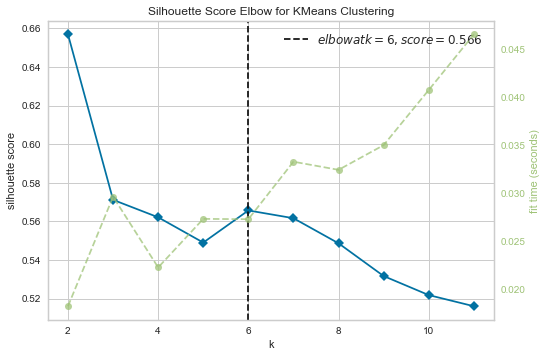

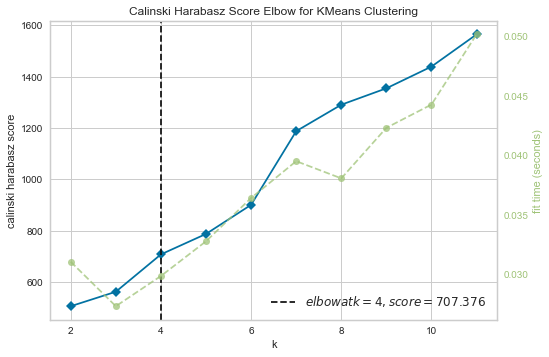

In [80]:
# 3 clusters / distortion
model_2 = KMeans(n_clusters=3)
visualizer_2d = KElbowVisualizer(model_1, k=(2,12))

visualizer_2d.fit(X)
visualizer_2d.poof()

# 3 clusters / silhouette

visualizer_2s = KElbowVisualizer(model_1, k=(2,12), metric="silhouette")

visualizer_2s.fit(X)
visualizer_2s.poof()

# 3 clusters / calinski_harabasz

visualizer_2c = KElbowVisualizer(model_1, k=(2,12), metric="calinski_harabasz")

visualizer_2c.fit(X)
visualizer_2c.poof()

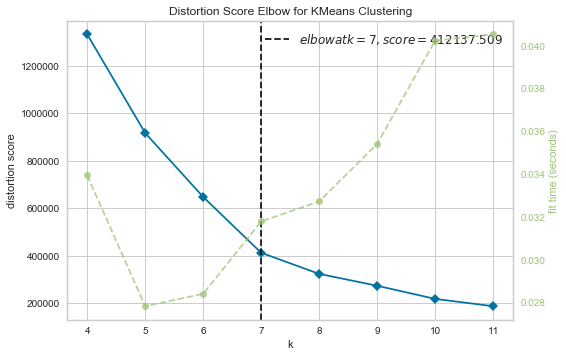

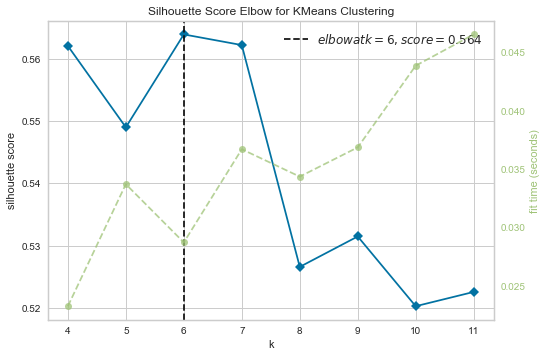

/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


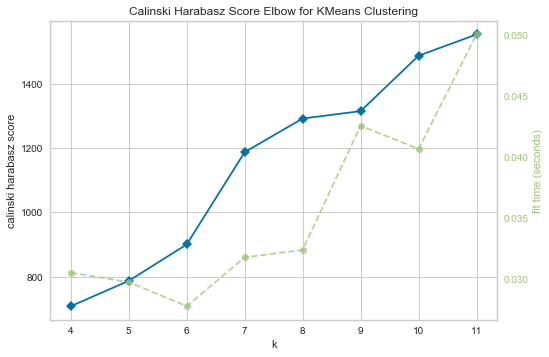

In [81]:
# 5 clusters / distortion
model_3 = KMeans(n_clusters=5)
visualizer_3d = KElbowVisualizer(model_1, k=(4,12))

visualizer_3d.fit(X)
visualizer_3d.poof()

# 5 clusters / silhouette

visualizer_3s = KElbowVisualizer(model_1, k=(4,12), metric="silhouette")

visualizer_3s.fit(X)
visualizer_3s.poof()

# 5 clusters / calinski_harabasz

visualizer_3c = KElbowVisualizer(model_1, k=(4,12), metric="calinski_harabasz")

visualizer_3c.fit(X)
visualizer_3c.poof()

In [86]:
# Voy a probar con 6, porque es el número de clusters que me han recomendado las tres veces
# que he probado con la métrica silhouette

kmeans_4 = KMeans(n_clusters=6).fit_predict(X)

In [104]:
kmeans_4

array([5, 5, 2, 4, 1, 4, 2, 2, 5, 5, 4, 2, 2, 5, 4, 2, 2, 5, 4, 1, 1, 1,
       5, 5, 1, 1, 2, 2, 1, 5, 2, 4, 5, 2, 5, 1, 1, 5, 5, 1, 1, 5, 5, 3,
       1, 5, 5, 5, 5, 2, 5, 2, 2, 2, 5, 5, 5, 2, 2, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 1, 3, 1, 0, 0, 5, 1, 0, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 1, 1, 0, 3, 3, 3, 0, 0, 0, 3,
       3, 3, 0, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 1, 3, 0, 0, 3, 1, 1, 1,
       1, 3], dtype=int32)

In [87]:
s_score4 = silhouette_score(X, kmeans_4)
s_score4

0.5656413100386389

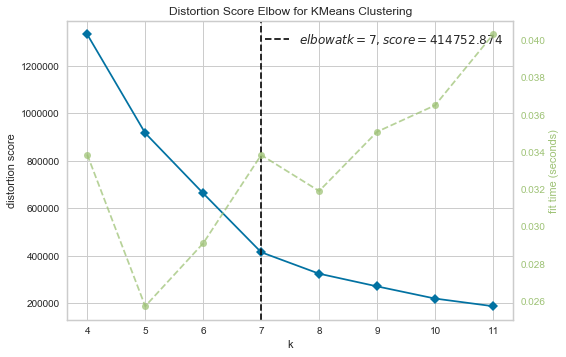

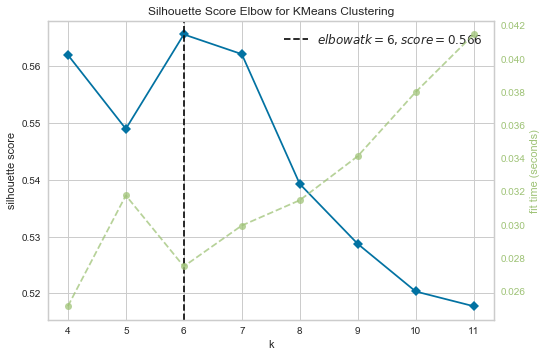

/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


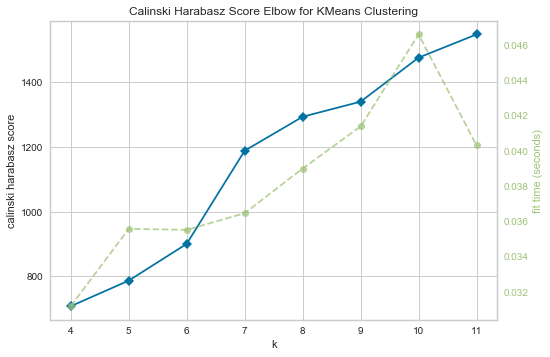

In [88]:
# 6 clusters / distortion
model_4 = KMeans(n_clusters=6)
visualizer_4d = KElbowVisualizer(model_1, k=(4,12))

visualizer_4d.fit(X)
visualizer_4d.poof()

# 5 clusters / silhouette

visualizer_4s = KElbowVisualizer(model_1, k=(4,12), metric="silhouette")

visualizer_4s.fit(X)
visualizer_4s.poof()

# 5 clusters / calinski_harabasz

visualizer_4c = KElbowVisualizer(model_1, k=(4,12), metric="calinski_harabasz")

visualizer_4c.fit(X)
visualizer_4c.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [92]:
# Compruebo con 6 clusters

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=6).fit(X)

In [93]:
labels = clustering.labels_

In [94]:
agg_sscore = silhouette_score(X, labels)
agg_sscore

0.5270523448339738

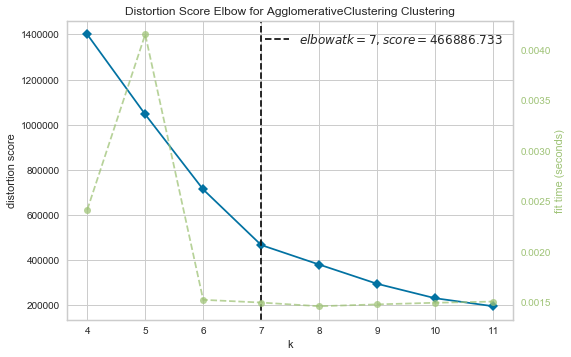

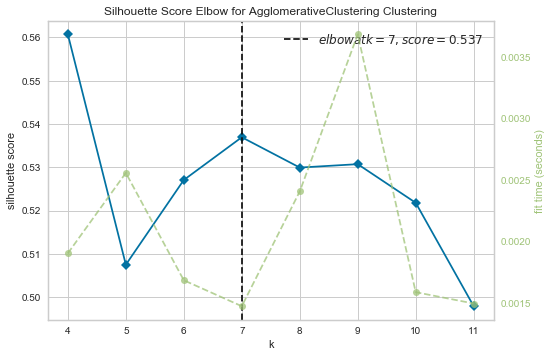

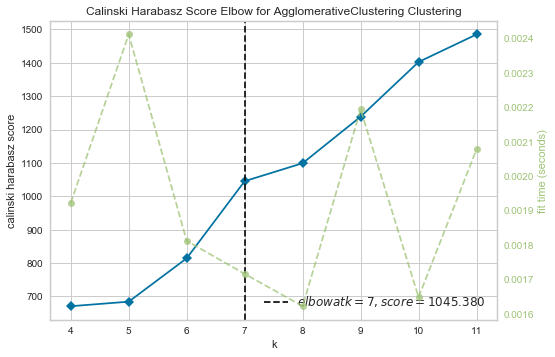

In [95]:
# AgglomerativeClustering / distortion

agg_model = AgglomerativeClustering(n_clusters=6)
visualizer_agg_d = KElbowVisualizer(agg_model, k=(4,12))

visualizer_agg_d.fit(X)
visualizer_agg_d.poof()

# AgglomerativeClustering / silhouette

visualizer_agg_s = KElbowVisualizer(agg_model, k=(4,12), metric="silhouette")

visualizer_agg_s.fit(X)
visualizer_agg_s.poof()

# AgglomerativeClustering / calinski_harabasz

visualizer_agg_c = KElbowVisualizer(agg_model, k=(4,12), metric="calinski_harabasz")

visualizer_agg_c.fit(X)
visualizer_agg_c.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [106]:
# No he entendido lo que hay que hacer. O no he sabido cómo hacerlo.

X['labels'] = kmeans_4
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,5
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,5
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,4
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [119]:
# pd.crosstab(X["alcohol"], X["labels"])

In [116]:
X_1 = X[['alcohol','malic_acid', 'ash', 'labels']]

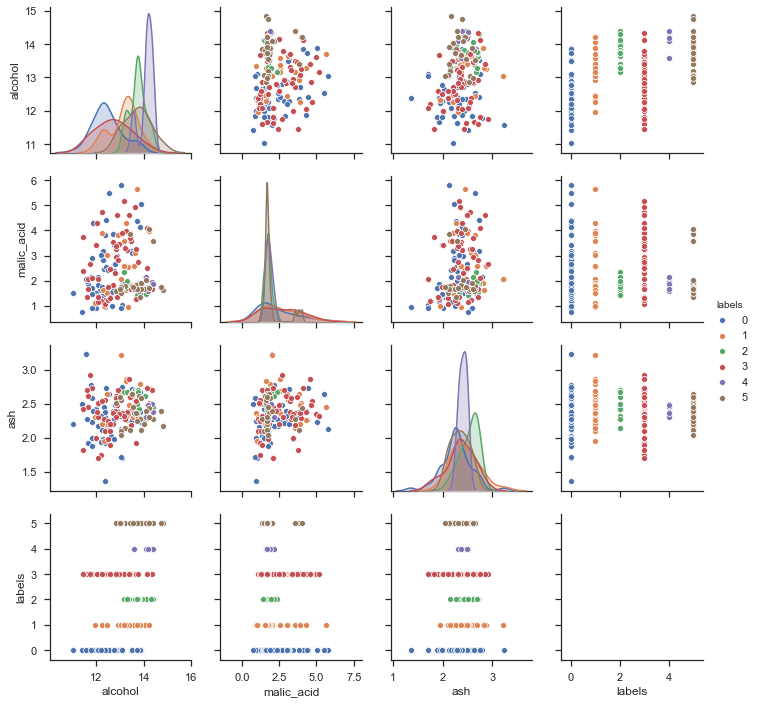

In [117]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(X_1, hue="labels")

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)

plt.show()


In [130]:
X.shape

(1500, 2)

In [139]:
type(X["labels"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

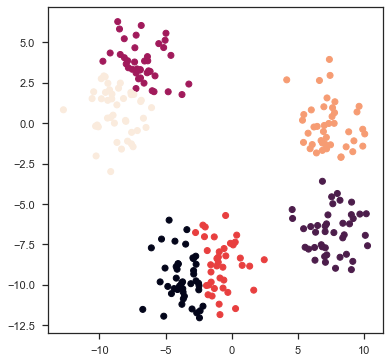

In [131]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=1500//6, centers=6, cluster_std=1.5)

model_4 = KMeans(n_clusters=6)
model_4.fit(X)
y_pred = model_4.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

centers = kmeans_4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)

plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.